In [30]:
!ls

datalab  glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
drive	 glove.6B.200d.txt  glove.6B.50d.txt   nltk_data


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
train = pd.read_csv('drive/app/kaggle/toxic comment/train.csv')
test = pd.read_csv("drive/app/kaggle/toxic comment/test.csv")

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
train.shape

(159571, 8)

In [5]:
test.shape

(153164, 2)

In [6]:
train['obscene'].describe()

count    159571.000000
mean          0.052948
std           0.223931
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: obscene, dtype: float64

In [7]:
train[train["toxic"]>0].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [8]:
lens = train.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(394.0732213246768, 590.7202819048919, 5000)

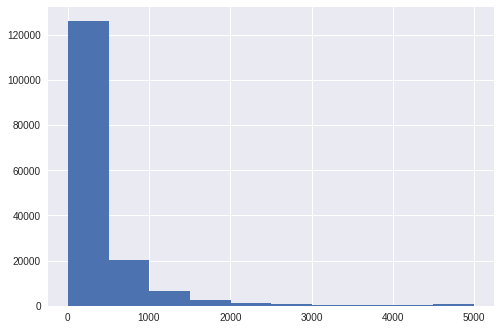

In [9]:
lens.hist()

In [0]:
COMMENT = 'comment_text'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)

In [11]:
len(train),len(test)

(159571, 153164)

In [12]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [0]:
train = train.drop('id',axis = 1)
X_test = test.drop("id", axis =1)

In [14]:
X_test.shape

(153164, 1)

In [0]:
X_test = X_test.values.ravel()

In [16]:
X_test.shape

(153164,)

In [0]:
X, y = train['comment_text'].values, train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train

array(['"\n\nConflict of interest note\nBy your user name, it appears that you represent a company or organization. Please read our conflict of interest guidelines as well as our FAQ for businesses. We welcome your contributions here, but please refrain from writing about your own company\'s services and personnel. Thanks, and happy editing! \'\'\'\'\'\'Speaketh "',
       '(update: actually, I changed this to something blander)',
       'MRCA article \nSniperz11, thanks for your comments on my edits. I added some part about Mirage-2000 being the original MRCA in the Indian Air Force article. But frankly speaking I think that there is no need at all for a separate MRCA article. Although it is very large, its just another military contract. In my opinion, contracts and tenders might not deserve separate articles, but can have large sections describing them. Thanks.',
       ...,
       "I won't stop that. Sometimes Germanic equals Germany or todays people of Germanic descent. Germanic i

In [0]:
import re, string
from nltk.tokenize import word_tokenize
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]',' ',text)
 #   text = text.translate(" ", string.punctuation)
#    text = re.sub(REPLACE_BY_SPACE_RE," ",text)
#     text = re.sub(BAD_SYMBOLS_RE,"",text)
    text = [i for i in text.split() if i not in STOPWORDS]
    return " ".join(text)

In [25]:
j = 'BOBBY@FIRMINO c# c++ '
text_prepare(j)

'bobby firmino c c'

In [26]:
X_train.shape

(111699,)

In [0]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [0]:
import itertools
import nltk
words_counts = {}
def most_common(X):
    X_train_join = " ".join(X)
    X_train_tokens = X_train_join.split()
    dist = nltk.FreqDist(X_train_tokens)
    return dist.most_common(5000)
jj= most_common(X_train)
words_counts = dict(most_common(X_train))

In [29]:
list(words_counts.items())[:5]

[('article', 40488),
 ('wikipedia', 33753),
 ('page', 32506),
 ('talk', 26080),
 ('please', 20909)]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
a=list(words_counts.keys())
DICT_SIZE = 5000
WORDS_TO_INDEX = {k: v for v, k in enumerate(a)}
def my_bag_of_words(text, words_to_index, dict_size):
    text = [text]
    vectorizer = CountVectorizer(vocabulary = words_to_index,max_features = dict_size)
    vector = vectorizer.transform(text)
    result_vector=vector.toarray()
    return result_vector

In [33]:
list(WORDS_TO_INDEX.items())[:5]

[('article', 0), ('wikipedia', 1), ('page', 2), ('talk', 3), ('please', 4)]

In [0]:
from scipy import sparse as sp_sparse

In [35]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])


print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)

X_train shape  (111699, 5000)
X_val shape  (47872, 5000)


In [37]:
X_train_mybag

<111699x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2538888 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf_vectorizer = TfidfVectorizer(min_df=5,max_df = 0.9,ngram_range=(1, 3))
tfidf_vectorizer.fit(X_train)
X_train_tfid = tfidf_vectorizer.transform(X_train)
X_val_tfid = tfidf_vectorizer.transform(X_val)
X_test_tfid = tfidf_vectorizer.transform(X_test)

In [41]:
X_train_tfid

<111699x120417 sparse matrix of type '<class 'numpy.float64'>'
	with 4460178 stored elements in Compressed Sparse Row format>

In [0]:
tfidf_vocab = tfidf_vectorizer.vocabulary_
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [43]:
list(tfidf_reversed_vocab.items())[:5]

[(24301, 'conflict'),
 (52278, 'interest'),
 (69198, 'note'),
 (110088, 'user'),
 (66374, 'name')]

In [44]:
list(tfidf_vocab.items())[:5]

[('conflict', 24301),
 ('interest', 52278),
 ('note', 69198),
 ('user', 110088),
 ('name', 66374)]

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [0]:
def train_classifier(X_train, y_train):
    model = OneVsRestClassifier(LogisticRegression(C = 4)).fit(X_train, y_train)
    return model

In [0]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfid, y_train)

In [0]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)
y_test_predicted_scores_mybag = classifier_mybag.decision_function(X_test_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfid)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfid)
y_test_predicted_scores_tfidf = classifier_tfidf.decision_function(X_test_tfid)                                         

In [50]:
y_val_predicted_labels_mybag

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [0]:
def print_evaluation_scores(y_val, predicted):
    x = accuracy_score(y_val, predicted)
    y_macro = f1_score(y_val, predicted,average='macro')
    y_micro = f1_score(y_val, predicted,average='micro')
    y_weighted = f1_score(y_val, predicted,average='weighted')
    z_macro = average_precision_score(y_val, predicted,average='macro')
    z_micro = average_precision_score(y_val, predicted,average='micro')
    z_weighted = average_precision_score(y_val, predicted,average='weighted')
    return x,y_macro,y_micro,y_weighted,z_macro,z_micro,z_weighted

In [53]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)


Bag-of-words


(0.9089029077540107,
 0.34756542586212213,
 0.5759748427672956,
 0.5579993384224498,
 0.230112778626225,
 0.3934460129819823,
 0.40971923733224686)

In [54]:
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

Tfidf


(0.9191176470588235,
 0.5221018085692409,
 0.694671201814059,
 0.6865407683015239,
 0.3554098523792136,
 0.5181105405511249,
 0.5314085979246491)

In [55]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [0]:
zz = pd.read_csv("drive/app/kaggle/toxic comment/sample_submission.csv",na_filter=False)

In [75]:
zz.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [76]:
zz[zz["id"] == '0195127977159338']

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
942,0195127977159338,0.5,0.5,0.5,0.5,0.5,0.5


In [57]:
y_test_predicted_scores_tfidf

array([[ 7.34422033, -1.27895988,  6.27600887, -3.06797711,  2.86230381,
        -1.19904771],
       [-6.08987304, -6.79677196, -5.86789613, -7.05110349, -5.89571061,
        -6.32231342],
       [-3.93572274, -6.16673354, -4.88982151, -6.98844969, -4.60591806,
        -5.92568918],
       ...,
       [-5.76134919, -6.82031567, -5.87332416, -7.2694743 , -6.20798158,
        -7.86854985],
       [-3.69530723, -6.74197943, -4.30225892, -6.37879961, -4.53541004,
        -4.46575408],
       [ 3.46972944, -6.29378212,  0.51105023, -6.07302507, -0.86702696,
        -5.05674535]])

In [0]:
zz.iloc[:,1:] = y_test_predicted_scores_tfidf
zz.to_csv('drive/app/kaggle/toxic comment/linear_scores_tfidf.csv',index=False)